<a href="https://colab.research.google.com/github/rstar900/PySDR/blob/main/01_frequency_domain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

All the examples here are based on https://pysdr.org/content/frequency_domain.html

# Plotting a sine function in time domain

The code below contains the plot of a 0.15 Hz frequency sine wave sampled at 1 Hz.

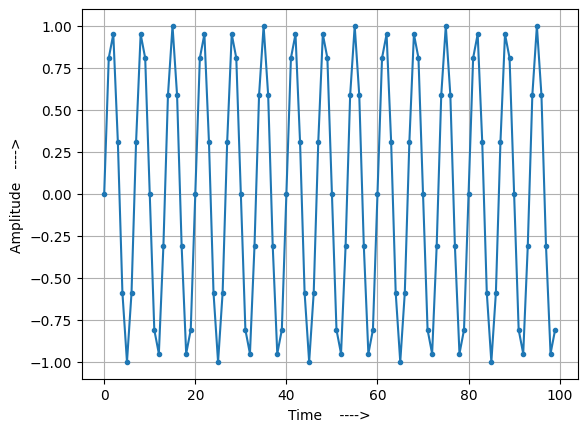

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Frequency of the wave
F = 0.15
# 100s Time array (x-axis) (from 0-99s)
t = np.arange(100)
# Sine function with f = 0.15 Hz sampled for 100s
s = np.sin(2 * np.pi * F * t)
# Create and disply the plot in time domain
plt.plot(t, s, '.-')
plt.xlabel('Time    ---->')
plt.ylabel('Amplitude   ---->')
plt.grid()
plt.show()


# Plotting a sine function in frequency domain

We now use Fast Fourier Transform (FFT) to convert the sine function above into to frequency domain and then use a shift function to align the x axis with 0 Hz as the central frequency and -0.5 and 0.5 Hz on either ends.

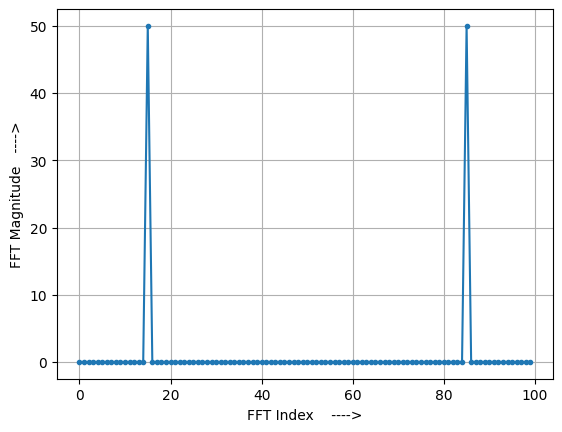

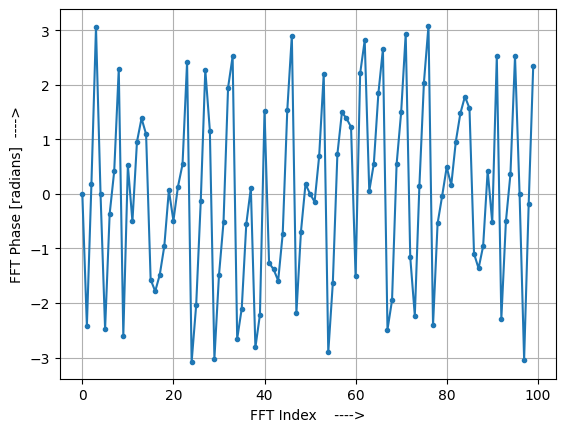

In [69]:
# The FFT of the sine function
S = np.fft.fft(s)
# Magnitude of this function
S_mag = np.abs(S)
# Phase of this function in radians
S_phase = np.angle(S)

# Plot the graph for magnitude
plt.figure(0)
plt.plot(t, S_mag, '.-')
plt.xlabel('FFT Index    ---->')
plt.ylabel('FFT Magnitude   ---->')
plt.grid()

# Plot the graph for phase
plt.figure(1)
plt.plot(t, S_phase, '.-')
plt.xlabel('FFT Index    ---->')
plt.ylabel('FFT Phase [radians]  ---->')
plt.grid()

# Display both the plots
plt.show()

Plot the same but with FFT shift to correct x-axis to frequency domain

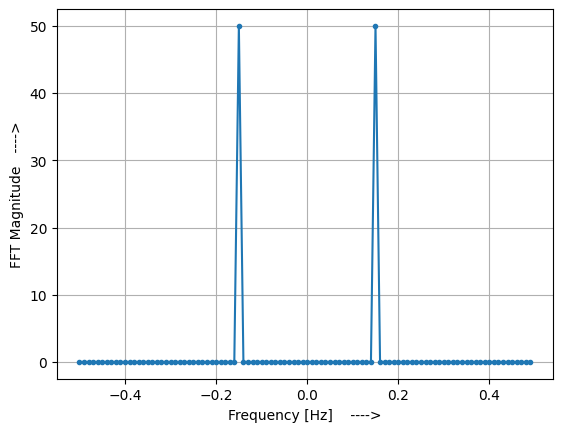

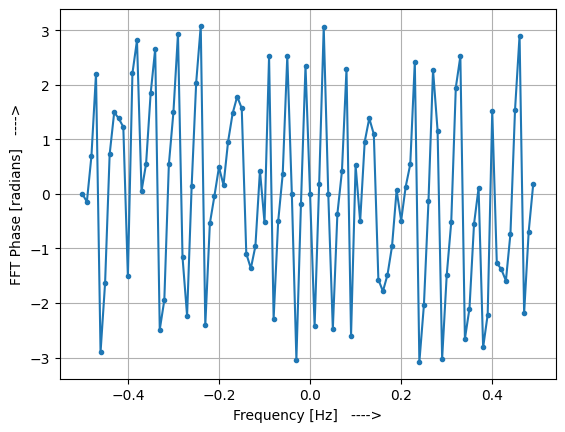

In [70]:
# Sampling frequency (in Hz)
Fs = 1
# Number of samples
N = 100
# Frequencies in x-axis
f = np.arange(Fs/-2, Fs/2, Fs/N)

# Applying the FFT shift to S
S = np.fft.fftshift(S)
# Magnitude of this function
S_mag = np.abs(S)
# Phase of this function in radians
S_phase = np.angle(S)

# Plot the graph for magnitude
plt.figure(0)
plt.plot(f, S_mag, '.-')
plt.xlabel('Frequency [Hz]    ---->')
plt.ylabel('FFT Magnitude   ---->')
plt.grid()

# Plot the graph for phase
plt.figure(1)
plt.plot(f, S_phase, '.-')
plt.xlabel('Frequency [Hz]   ---->')
plt.ylabel('FFT Phase [radians]   ---->')
plt.grid()

# Display both the plots
plt.show()

# Windowing

To make our function more suitable for FFT, we use windowing. In this case we will apply Hamming window function to taper both the ends of the function values towards zero. This will ensure that the signal will start and end at zero and will connect.

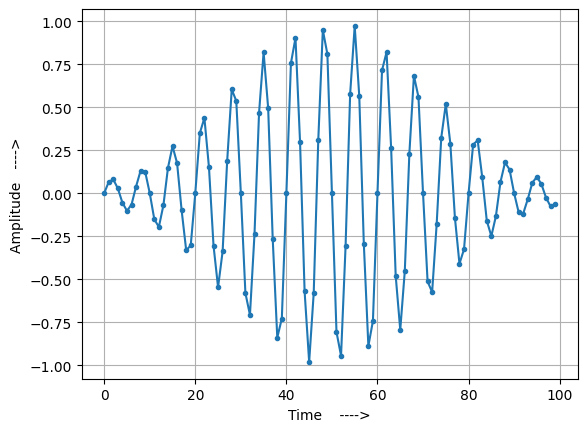

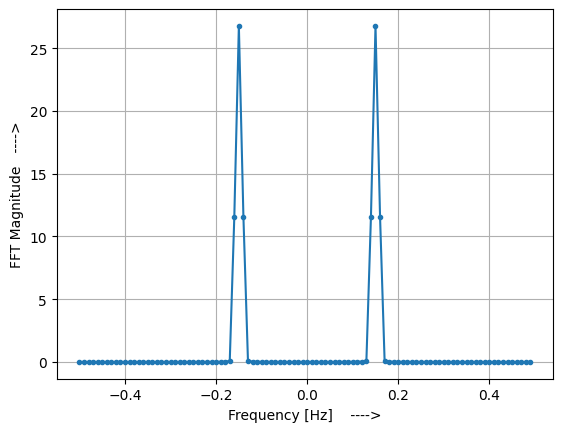

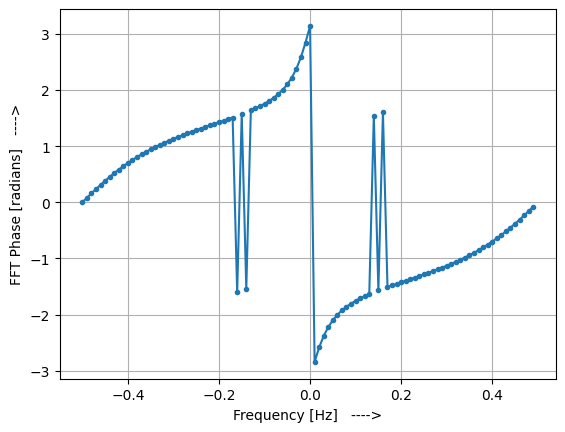

In [71]:
# We do this before calculating s, so we rewrite the code so far but this time with windowing

import numpy as np
import matplotlib.pyplot as plt

'''
## For Time domain ##
'''

# Frequency of the wave
F = 0.15
# 100s Time array (x-axis) (from 0-99s)
t = np.arange(100)
# Sine function with f = 0.15 Hz sampled for 100s
s = np.sin(2 * np.pi * F * t)
# Apply Hamming window function to sine function with a window size of 100
s = s * np.hamming(100)
# Create and disply the plot in time domain
plt.figure(0)
plt.plot(t, s, '.-')
plt.xlabel('Time    ---->')
plt.ylabel('Amplitude   ---->')
plt.grid()

'''
## For Frequency domain ##
'''

# Sampling frequency (in Hz)
Fs = 1
# Number of samples
N = 100
# Frequencies in x-axis
f = np.arange(Fs/-2, Fs/2, Fs/N)

# The FFT of the sine function
S = np.fft.fft(s)
# Applying the FFT shift to S
S = np.fft.fftshift(S)
# Magnitude of this function
S_mag = np.abs(S)
# Phase of this function in radians
S_phase = np.angle(S)

# Plot the graph for magnitude
plt.figure(1)
plt.plot(f, S_mag, '.-')
plt.xlabel('Frequency [Hz]    ---->')
plt.ylabel('FFT Magnitude   ---->')
plt.grid()

# Plot the graph for phase
plt.figure(2)
plt.plot(f, S_phase, '.-')
plt.xlabel('Frequency [Hz]   ---->')
plt.ylabel('FFT Phase [radians]   ---->')
plt.grid()

# Display all the plots
plt.show()


# Spectrogram / Waterfall

A spectrogram is the plot that shows frequency over time. It is simply a bunch of FFTs stacked together (vertically, if you want frequency on the horizontal axis). We can also show it in real-time, often referred to as a waterfall. A spectrum analyzer is the piece of equipment that shows this spectrogram/waterfall.

An example code to produce a signal which is simply a tone in white noise

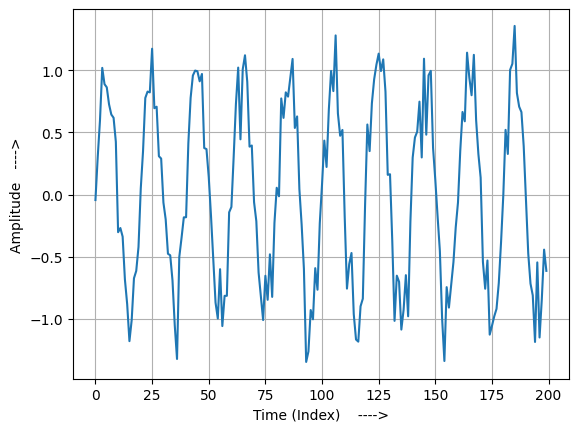

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Sampling frequency (or sampling rate) of 1 MHz
Fs = 1e6
# Frequency of the signal (i.e. frequency of the tone)
F = 50e3

# Time vector
# We divide by Fs because 1/Fs is simply the time period (T) of sampling
# It simply multiplies each indice with T, so each value is a multiple of T
# Because T is the smallest interval possible by sampling with a frequency of Fs
t = np.arange(1024 * 1000) / Fs

# Signal with some noise
x = np.sin(2 * np.pi * F * t) + 0.2 * np.random.randn(len(t))

# Plot the first 200 samples
plt.plot(np.arange(200), x[:200]) # Instead of using actual time, we use indices for simplicity
plt.xlabel('Time (Index)    ---->')
plt.ylabel('Amplitude   ---->')
plt.grid()
plt.show()

Now coming to the spectrogram code

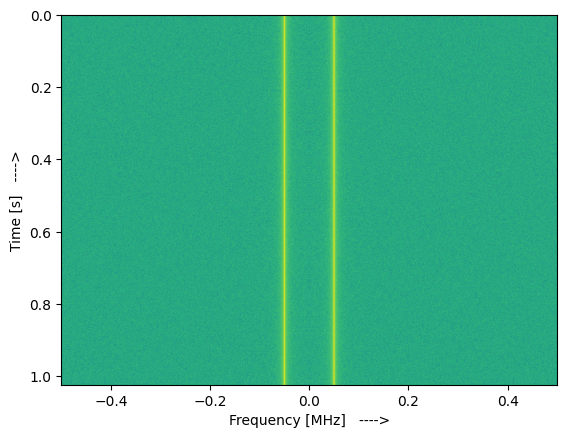

In [73]:
fft_size = 1024 # Each row will contain 1024 samples
num_rows = len(x) // fft_size # We want integer division to get a whole number of rows

# The spectrogram containing fft_rows rows, each containging fft_size samples (initially all zeroes)
spectrogram = np.zeros((num_rows, fft_size))

# Populate the spectrogram with values of x
for i in range(num_rows):
  # Since it is a 2D Numpy matrix, [i, :] will only select elements of ith row
  # spectrogram[i:] would have selected a slice of all elements from i till the end of matrix instead
  # FFT: Get Frequency content (Complex numbers).
  # Abs: Get Magnitude (Amplitude).
  # **2: Convert Amplitude to Power.
  # log10: Convert Power to Log Scale.
  # 10*: Convert Log Scale to Decibels.
  spectrogram[i, :] = 10 * np.log10(np.abs(np.fft.fftshift(np.fft.fft(x[i * fft_size : (i+1) * fft_size]))) ** 2)

# Display the spectrogram
plt.imshow(spectrogram, aspect='auto', extent=[Fs / -2 / 1e6, Fs / 2 / 1e6, len(x) / Fs, 0])
plt.xlabel('Frequency [MHz]   ---->')
plt.ylabel('Time [s]   ---->')
plt.show()

# Implementing our own FFT Algorithm

Here `my_fft()` is our own FFT implementation, which is not as optimized as numpy's version, hence it takes noticeable time, but gets the job done.

`np.roll(X, N // 2)` is the equivalent of `np.fft.fftshift()`.

We try `my_fft()` on the previous spectrogram example.

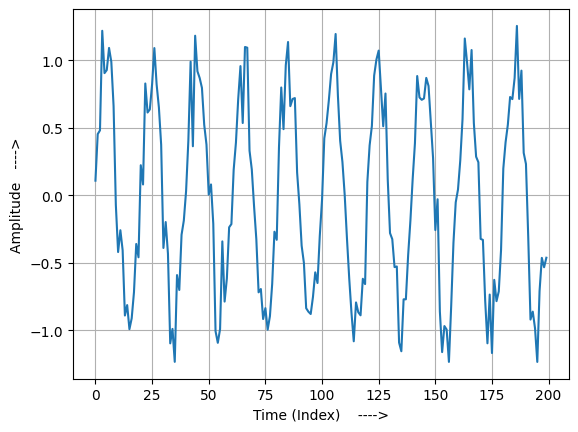

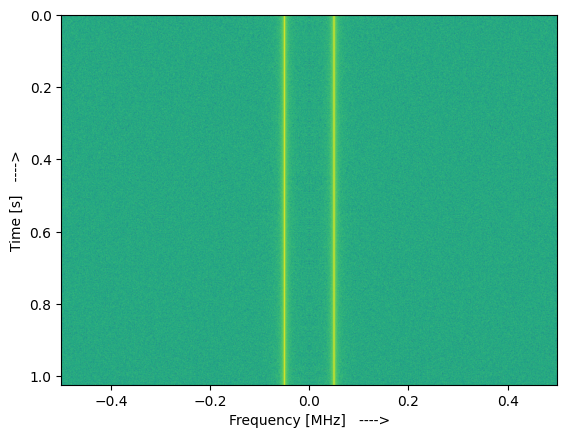

In [74]:
import numpy as np
import matplotlib.pyplot as plt

'''
Limitation: This implementation only works properly
with samples array of sizes of powers of 2
The defensive coding part
and power of 2 check for length are ideas from
https://www.youtube.com/watch?v=isUMxOIpcj4
'''
def my_fft(samples):

  N = len(samples)

  # Base case (As a defensive coding approach, we want to handle 0 length arrays as well)
  if N <= 1:
    return samples

  # We also check if the length is a power of 2 or not just to work with right lengths
  if np.log2(N) % 1 != 0:
    raise ValueError("Length of input array is not a power of 2!")

  # Recursive case

  # We divide array into even and odd element arrays and define a twiddle factor
  samples_even = my_fft(samples[::2])
  samples_odd = my_fft(samples[1::2])
  twiddle_factors = np.exp(-2j * np.pi * np.arange(N // 2) / N)

  # Butterfly operation
  return np.concatenate(
      [samples_even + twiddle_factors * samples_odd,
      samples_even - twiddle_factors * samples_odd]
  )


# Test the my_fft function on previous spectrogram example

try:
 # Sampling frequency (or sampling rate) of 1 MHz
 Fs = 1e6
 # Frequency of the signal (i.e. frequency of the tone)
 F = 50e3

 # Time vector
 # We divide by Fs because 1/Fs is simply the time period (T) of sampling
 # It simply multiplies each indice with T, so each value is a multiple of T
 # Because T is the smallest interval possible by sampling with a frequency of Fs
 t = np.arange(1024 * 1000) / Fs

 # Signal with some noise
 x = np.sin(2 * np.pi * F * t) + 0.2 * np.random.randn(len(t))

 # Plot the first 200 samples
 plt.figure(0)
 plt.plot(np.arange(200), x[:200]) # Instead of using actual time, we use indices for simplicity
 plt.xlabel('Time (Index)    ---->')
 plt.ylabel('Amplitude   ---->')
 plt.grid()

 fft_size = 1024 # Each row will contain 1024 samples
 num_rows = len(x) // fft_size # We want integer division to get a whole number of rows

 # The spectrogram containing fft_rows rows, each containging fft_size samples (initially all zeroes)
 spectrogram = np.zeros((num_rows, fft_size))

 # Populate the spectrogram with values of x
 for i in range(num_rows):
   # Since it is a 2D Numpy matrix, [i, :] will only select elements of ith row
   # spectrogram[i:] would have selected a slice of all elements from i till the end of matrix instead
   # FFT: Get Frequency content (Complex numbers).
   # Abs: Get Magnitude (Amplitude).
   # **2: Convert Amplitude to Power.
   # log10: Convert Power to Log Scale.
   # 10*: Convert Log Scale to Decibels.
   spectrogram[i, :] = 10 * np.log10(np.abs(np.roll(my_fft(x[i * fft_size : (i+1) * fft_size]), fft_size // 2)) ** 2)

 # Display the spectrogram
 plt.figure(1)
 plt.imshow(spectrogram, aspect='auto', extent=[Fs / -2 / 1e6, Fs / 2 / 1e6, len(x) / Fs, 0])
 plt.xlabel('Frequency [MHz]   ---->')
 plt.ylabel('Time [s]   ---->')
 plt.show()

except ValueError as e:
  print("Error:", e)


Now we will also test `my_fft()` on another scenario, i.e. a simulated tone + noise and plot it.

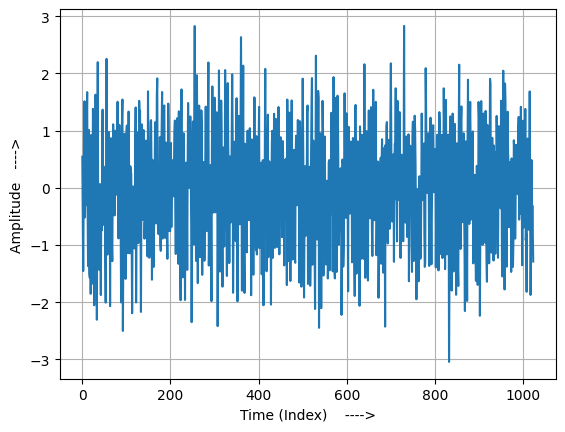

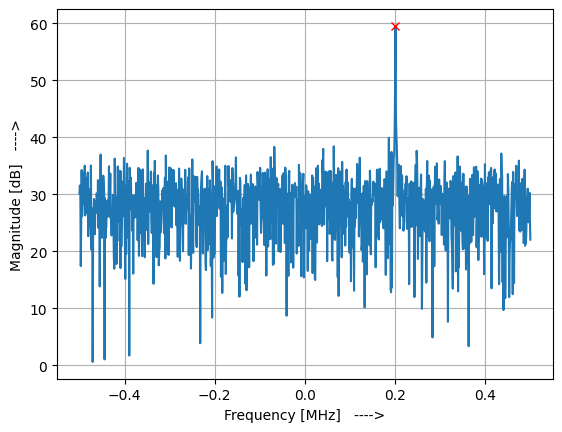

In [75]:
try:

  # Simulate tone + noise
  Fs = 1e6 # 1 MHz sampling rate
  F = 0.2e6 # 200 kHz signal frequency (or 200 kHz offset from carrier)
  N = 1024 # Number of samples
  t = np.arange(N) / Fs # 1/Fs will make the values multiples of time interval (T)
  s = np.exp(2j * np.pi * F * t) # Main tone
  n = (np.random.randn(N) + 1j * np.random.randn(N)) / np.sqrt(2) # Unity complex noise
  r = s + n # 0 dB SNR

  # Plot the signal in Time domain
  plt.plot(np.arange(N), r.real) # We use real part to see amplitude as it is a complex signal otherwise
  plt.xlabel('Time (Index)    ---->')
  plt.ylabel('Amplitude   ---->')
  plt.grid()
  plt.show()

  # Perform fft, fftshift and convert to dB
  X = my_fft(r)
  X = np.roll(X, N // 2) # Equivalent to np.fft.fftshift()
  X_mag = 10 * np.log10(np.abs(X) ** 2)

  # Plot results
  f = np.linspace(Fs/-2, Fs/2, N) / 1e6 # plot frequencies in MHz
  plt.plot(f, X_mag)
  plt.plot(f[np.argmax(X_mag)], np.max(X_mag), 'rx') # Indicate max magnitude on graph
  plt.xlabel('Frequency [MHz]   ---->')
  plt.ylabel('Magnitude [dB]   ---->')
  plt.grid()
  plt.show()

except ValueError as e:
  print('Error:', e)